In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir_path = "gdrive/My Drive/Canny Edge Dataset/dru"

In [ ]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/Canny Edge Dataset/dru/train/R/103.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/380.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/276.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/422.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/524.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/293.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/370.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/214.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/247.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/221.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/473.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/613.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/181.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/327.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/362.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/322.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/482.jpg
gdrive/My Drive/Canny Edge Dataset/dru/train/R/584.jpg
gdrive/My 

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D
import os

In [ ]:
sz = 128
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(sz,sz,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(96,activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(4,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               7872640   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

In [ ]:
dir_path = "gdrive/My Drive/Canny Edge Dataset/tkdi"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_path = dir_path + '/train'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

Found 1896 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_path = dir_path + '/test'
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 631 images belonging to 4 classes.


In [ ]:
history = model.fit(
        training_set,
         # No of images in training set
        epochs=5,
        validation_data=test_set,
         verbose = 1)

Epoch 1/5
190/190 [==============================] - 650s 3s/step - loss: 1.3829 - accuracy: 0.3468 - val_loss: 0.2674 - val_accuracy: 0.9160
Epoch 2/5
190/190 [==============================] - 7s 38ms/step - loss: 0.4562 - accuracy: 0.8255 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 3/5
190/190 [==============================] - 7s 39ms/step - loss: 0.1532 - accuracy: 0.9473 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoch 4/5
190/190 [==============================] - 7s 38ms/step - loss: 0.1130 - accuracy: 0.9676 - val_loss: 1.4859e-04 - val_accuracy: 1.0000
Epoch 5/5
190/190 [==============================] - 7s 38ms/step - loss: 0.0474 - accuracy: 0.9818 - val_loss: 1.3973e-05 - val_accuracy: 1.0000


In [ ]:
print(history.history.keys())


In [ ]:
history.history

{'accuracy': [0.4915611743927002,
  0.86972576379776,
  0.950421929359436,
  0.9715189933776855,
  0.9878692030906677],
 'loss': [1.094702124595642,
  0.34488508105278015,
  0.14731699228286743,
  0.10378853976726532,
  0.04108857735991478],
 'val_accuracy': [0.916006326675415, 1.0, 0.9936608672142029, 1.0, 1.0],
 'val_loss': [0.2674163281917572,
  0.006949267350137234,
  0.021418137475848198,
  0.00014859126531518996,
  1.3973339264339302e-05]}

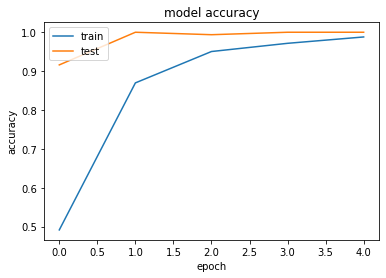

In [ ]:
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

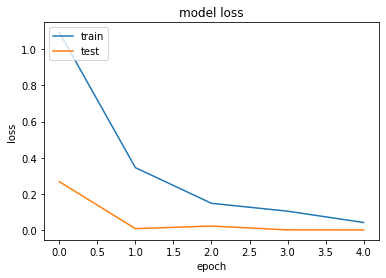

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model-tkdi2.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model-tkdi2.h5')
print('Weights saved')

Model Saved
Weights saved
